In [1]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Create a file path
census_data = pd.read_csv("Resources/census_data_2014_2022.csv")

# Read in the data. 
census_data.head()

,Owner_Occupied_Units,Owner_White_alone,Owner_Black_African_American_alone,Owner_American_Indian_Alaska_Native_alone,Owner_Asian_alone,Owner_Native_Hawaiian_Other_Pacific_Islander_alone,Owner_Some_other_race_alone,Owner_Two_or_more_races,Owner_White_no_Hispanic_or_Latino,Owner_Hispanic_Latino,...,Black_African_American,American_Indian_Alaska_Native,Asian,Native_Hawaiian_Other_Pacific_Islander,Other_Race,Two_More_Races,Count_Inds_Income_Past_12_Mos_<_Pov_Level,state,Zip_code,year
0,2627.0,2536.0,0.0,0.0,0.0,0.0,45.0,46.0,2477.0,104.0,...,0.0,0.0,0.0,0.0,45.0,46.0,145.0,25.0,2338,2014
1,3864.0,3760.0,18.0,0.0,62.0,0.0,0.0,24.0,3728.0,32.0,...,18.0,0.0,62.0,0.0,0.0,69.0,602.0,25.0,2339,2014
2,3040.0,2876.0,60.0,19.0,7.0,0.0,10.0,68.0,2812.0,74.0,...,60.0,19.0,7.0,0.0,10.0,68.0,391.0,25.0,2341,2014
3,3419.0,3196.0,119.0,0.0,76.0,0.0,28.0,0.0,2991.0,215.0,...,255.0,0.0,92.0,0.0,37.0,28.0,889.0,25.0,2343,2014
4,6470.0,6209.0,124.0,12.0,89.0,0.0,11.0,25.0,6148.0,73.0,...,153.0,12.0,89.0,0.0,36.0,73.0,1863.0,25.0,2346,2014


In [3]:
# Householder race and ownership over time
# Compare trends over time: 
# Calculate owner-occupancy rate
census_data['owner_occupancy_rate'] = (census_data['Owner_Occupied_Units'] / census_data['Total_Occupied_Units']) * 100

# Group by year and calculate the mean owner-occupancy rate for each year
owner_occupancy_by_year = census_data.groupby('year')['owner_occupancy_rate'].mean()
owner_occupancy_by_year


year
2014    73.299406
2019    73.357364
2020    73.775526
2021    74.226629
2022    74.465813
Name: owner_occupancy_rate, dtype: float64

In [4]:
# Calculate the percentage of White householders who are homeowners
census_data['percent_white_homeowners'] = (census_data['Owner_White_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_white_homeowners_by_year = census_data.groupby('year')['percent_white_homeowners'].mean()
percent_white_homeowners_by_year


year
2014    88.319796
2019    87.699679
2020    86.637880
2021    85.557543
2022    84.310066
Name: percent_white_homeowners, dtype: float64

In [5]:
# Calculate the percentage of black householders who are homeowners
census_data['percent_black_homeowners'] = (census_data['Owner_Black_African_American_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_black_homeowners_by_year = census_data.groupby('year')['percent_black_homeowners'].mean()
percent_black_homeowners_by_year


year
2014    5.857198
2019    5.904432
2020    5.831772
2021    5.759192
2022    5.757761
Name: percent_black_homeowners, dtype: float64

In [6]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Asian_homeowners'] = (census_data['Owner_Asian_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Asian_homeowners_by_year = census_data.groupby('year')['percent_Asian_homeowners'].mean()
percent_Asian_homeowners_by_year

year
2014    1.673909
2019    1.905514
2020    1.983701
2021    2.017108
2022    2.071310
Name: percent_Asian_homeowners, dtype: float64

In [7]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Hawaiian_homeowners'] = (census_data['Owner_Native_Hawaiian_Other_Pacific_Islander_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Hawaiian_homeowners_by_year = census_data.groupby('year')['percent_Hawaiian_homeowners'].mean()
percent_Hawaiian_homeowners_by_year

year
2014    0.057983
2019    0.061568
2020    0.064743
2021    0.069540
2022    0.071647
Name: percent_Hawaiian_homeowners, dtype: float64

In [8]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Am_Indian_homeowners'] = (census_data['Owner_American_Indian_Alaska_Native_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Am_Indian_homeowners_by_year = census_data.groupby('year')['percent_Am_Indian_homeowners'].mean()
percent_Am_Indian_homeowners_by_year

year
2014    1.557623
2019    1.592303
2020    1.584339
2021    1.562799
2022    1.568337
Name: percent_Am_Indian_homeowners, dtype: float64

In [9]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Some_other_race_alone'] = (census_data['Owner_Some_other_race_alone'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Other_homeowners_by_year = census_data.groupby('year')['percent_Some_other_race_alone'].mean()
percent_Other_homeowners_by_year

year
2014    1.284614
2019    1.431407
2020    1.589310
2021    1.797092
2022    2.021079
Name: percent_Some_other_race_alone, dtype: float64

In [10]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Two_or_more_homeowners'] = (census_data['Owner_Two_or_more_races'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Two_or_more_homeowners_by_year = census_data.groupby('year')['percent_Two_or_more_homeowners'].mean()
percent_Two_or_more_homeowners_by_year

year
2014    1.248877
2019    1.405097
2020    2.308255
2021    3.236726
2022    4.199799
Name: percent_Two_or_more_homeowners, dtype: float64

In [11]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_White_no_Hisp_homeowners'] = (census_data['Owner_White_no_Hispanic_or_Latino'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_White_no_Hisp_homeowners_by_year = census_data.groupby('year')['percent_White_no_Hisp_homeowners'].mean()
percent_White_no_Hisp_homeowners_by_year

year
2014    84.111063
2019    82.981059
2020    82.405336
2021    81.906558
2022    81.261772
Name: percent_White_no_Hisp_homeowners, dtype: float64

In [12]:
# Calculate the percentage of Am Indian Alaskan Native householders who are homeowners
census_data['percent_Hisp_homeowners'] = (census_data['Owner_Hispanic_Latino'] / census_data['Owner_Occupied_Units']) * 100

# Group by year and calculate the mean percentage for each year
percent_Hisp_homeowners_by_year = census_data.groupby('year')['percent_Hisp_homeowners'].mean()
percent_Hisp_homeowners_by_year

year
2014    5.830313
2019    6.521556
2020    6.725891
2021    6.902655
2022    7.105219
Name: percent_Hisp_homeowners, dtype: float64

In [13]:
# create df
summary_df = pd.DataFrame({
    'Percent White Homeowners': percent_white_homeowners_by_year,
    'Percent Black Homeowners': percent_black_homeowners_by_year,
    'Percent Am Ind/Al Nat Homeowners': percent_Am_Indian_homeowners_by_year,
    'Percent Asian Homeowners': percent_Asian_homeowners_by_year,
    'Percent Hawaiian/Pac Isl Homeowners': percent_Hawaiian_homeowners_by_year,
    'Percent Other Homeowners': percent_Other_homeowners_by_year,
    'Percent Two or More Homeowners': percent_Two_or_more_homeowners_by_year,
    'Percent White/Non Hispanic Homeowners': percent_White_no_Hisp_homeowners_by_year,
    'Percent Hispanic Homeowners': percent_Hisp_homeowners_by_year
})

# Optional: Reset index if you want 'Year' as a column for easier plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'year'}, inplace=True)


C:\Users\sohof\AppData\Local\Temp\ipykernel_15032\2921904196.py:76: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]  # The slope coefficient
C:\Users\sohof\AppData\Local\Temp\ipykernel_15032\2921904196.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]  # The p-value for the slope
C:\Users\sohof\AppData\Local\Temp\ipykernel_15032\2921904196.py:76: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

Group: Percent White Homeowners
  Slope: -0.4490
  R-squared: 0.7482
  P-value: 0.0583
  -> Fail to reject the null hypothesis. There is no significant trend in the homeownership rate for Percent White Homeowners.

Group: Percent Black Homeowners
  Slope: -0.0125
  R-squared: 0.3736
  P-value: 0.2734
  -> Fail to reject the null hypothesis. There is no significant trend in the homeownership rate for Percent Black Homeowners.

Group: Percent Am Ind/Al Nat Homeowners
  Slope: 0.0014
  R-squared: 0.0863
  P-value: 0.6315
  -> Fail to reject the null hypothesis. There is no significant trend in the homeownership rate for Percent Am Ind/Al Nat Homeowners.

Group: Percent Asian Homeowners
  Slope: 0.0498
  R-squared: 0.9956
  P-value: 0.0001
  -> Reject the null hypothesis. There is a significant trend in the homeownership rate for Percent Asian Homeowners.

Group: Percent Hawaiian/Pac Isl Homeowners
  Slope: 0.0016
  R-squared: 0.8325
  P-value: 0.0307
  -> Reject the null hypothesis. There

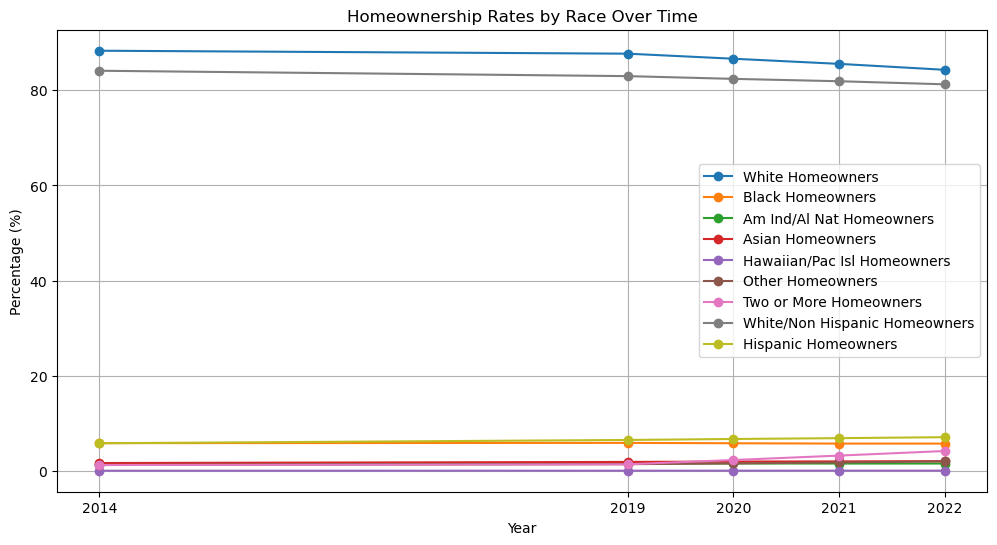

In [14]:
# visualization - create line graph & set size of plot
plt.figure(figsize=(12, 6))

# Plot each racial group's homeownership trend
plt.plot(summary_df['year'], summary_df['Percent White Homeowners'], label='White Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Black Homeowners'], label='Black Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Am Ind/Al Nat Homeowners'], label='Am Ind/Al Nat Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Asian Homeowners'], label='Asian Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Hawaiian/Pac Isl Homeowners'], label='Hawaiian/Pac Isl Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Other Homeowners'], label='Other Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Two or More Homeowners'], label='Two or More Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent White/Non Hispanic Homeowners'], label='White/Non Hispanic Homeowners', marker='o')
plt.plot(summary_df['year'], summary_df['Percent Hispanic Homeowners'], label='Hispanic Homeowners', marker='o')

# Set x-axis ticks
years = summary_df['year'].unique()  # Extract years from the DataFrame
plt.xticks(years, labels=years)  # Set x-axis ticks to show only the years

# Add selective data labels; Format to 2 decimal places
# for col in summary_df.columns[1:]:
#     plt.text(summary_df['year'].iloc[0], summary_df[col].iloc[0], f'{summary_df[col].iloc[0]:.2f}', color='blue', ha='center', va='bottom')
#     plt.text(summary_df['year'].iloc[-1], summary_df[col].iloc[-1], f'{summary_df[col].iloc[-1]:.2f}', color='blue', ha='center', va='bottom')


# Add data labels; Format to 2 decimal places
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_Other_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom') 
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_white_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom') 
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_black_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom')
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_Asian_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom') 
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_Two_or_more_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom') 
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_White_no_Hisp_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom')  
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_Hisp_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom') 
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_Hawaiian_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom') 
# for x, y in zip(percent_Other_homeowners_by_year.index, percent_Am_Indian_homeowners_by_year.values):
#     plt.text(x, y, f'{y:.2f}', color='blue', ha='center', va='bottom') 
    
# Adding titles and labels
plt.title('Homeownership Rates by Race Over Time')  # Title of the plot
plt.xlabel('Year')  # X-axis label
plt.ylabel('Percentage (%)')  # Y-axis label

# Display a legend to identify the lines
plt.legend()

# Optionally, display a grid
plt.grid(True)


# Assuming summary_df is your DataFrame and has the necessary data
# Define the racial groups
racial_groups = [
    'Percent White Homeowners', 'Percent Black Homeowners', 'Percent Am Ind/Al Nat Homeowners',
    'Percent Asian Homeowners', 'Percent Hawaiian/Pac Isl Homeowners', 'Percent Other Homeowners',
    'Percent Two or More Homeowners', 'Percent White/Non Hispanic Homeowners', 'Percent Hispanic Homeowners'
]

# Prepare the independent variable (year)
x = summary_df['year']
x_with_const = sm.add_constant(x)  # Adds a constant term to the predictor

# Initialize a dictionary to store the results
results = {}

# Loop through each racial group and perform linear regression
for group in racial_groups:
    y = summary_df[group]
    model = sm.OLS(y, x_with_const).fit()
    slope = model.params[1]  # The slope coefficient
    p_value = model.pvalues[1]  # The p-value for the slope
    
    results[group] = {
        'slope': slope,
        'p_value': p_value,
        'r_squared': model.rsquared
    }

# Display the results
for group, result in results.items():
    slope = result['slope']
    p_value = result['p_value']
    r_squared = result['r_squared']
    print(f"Group: {group}")
    print(f"  Slope: {slope:.4f}")
    print(f"  R-squared: {r_squared:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  -> Reject the null hypothesis. There is a significant trend in the homeownership rate for {group}.")
    else:
        print(f"  -> Fail to reject the null hypothesis. There is no significant trend in the homeownership rate for {group}.")
    print()



# plt.savefig('homeowner_race_line_chart14_22.png', format='png', dpi=300)

# Show the plot
plt.show()
